# Laboratorium 1 

In [1]:
# !pip3 install powerlaw
# import powerlaw

In [2]:
# %matplotlib notebook
# %matplotlib notebook

In [3]:
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np

from IPython import display
plt.rcParams['animation.ffmpeg_path'] = '/ffmpeg_folder/ffmpeg'

In [4]:
posible_values = [0,1,2,3,4]

edge_size = 10 

field = np.random.randint(low=0,high=4,size=(edge_size, edge_size))


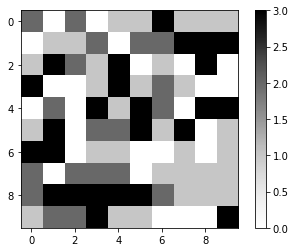

In [5]:
plt.imshow(field, cmap='Greys')

plt.colorbar()
plt.show()


In [6]:
def add_grain(grid, X, Y): 
    grid[X,Y] += 1


def avalanche(field: np.array):
    result = field.copy()
    top = np.where(result>=4)
    result[top] = 0

    for x, y in zip(*top):
        if x < edge_size-1:
            result[x+1, y] += 1
        if x > 0:
            result[x-1, y] += 1
        if y < edge_size-1:
            result[x, y+1] += 1
        if y > 0:
            result[x, y-1] += 1
    return result

def is_avalanche(grid: np.array) -> bool:
    top = np.where(grid>=4)
    if len(top[0])!=0:
        print("AVALANCHE")
        print("top:", top)
        return True
    print("No avalanche")
    return False

def draw_imshow(field):
    plt.imshow(field, cmap="Greys")
    plt.colorbar()
    plt.show()

In [7]:
row = np.random.randint(low=0, high=edge_size)
col = np.random.randint(low=0, high=edge_size)

print("random seed location:", row, col)

add_grain(field, row, col)

if is_avalanche(field):
    print(field)


result = avalanche(field)
print(result)

print(np.where(result!=field))


random seed location: 9 8
No avalanche
[[2 0 2 0 1 1 3 1 1 1]
 [0 1 1 2 0 2 2 3 3 3]
 [1 3 2 1 3 0 1 0 3 0]
 [3 0 0 1 3 1 2 1 0 0]
 [0 2 0 3 1 3 2 0 3 3]
 [1 3 0 2 2 3 1 3 0 1]
 [3 3 0 1 1 0 0 1 0 1]
 [2 0 2 2 2 0 1 1 1 1]
 [2 3 3 3 3 3 2 1 1 1]
 [1 2 2 3 1 1 0 0 1 3]]
(array([], dtype=int64), array([], dtype=int64))


In [8]:
n_result = avalanche(result)
print(n_result)

[[2 0 2 0 1 1 3 1 1 1]
 [0 1 1 2 0 2 2 3 3 3]
 [1 3 2 1 3 0 1 0 3 0]
 [3 0 0 1 3 1 2 1 0 0]
 [0 2 0 3 1 3 2 0 3 3]
 [1 3 0 2 2 3 1 3 0 1]
 [3 3 0 1 1 0 0 1 0 1]
 [2 0 2 2 2 0 1 1 1 1]
 [2 3 3 3 3 3 2 1 1 1]
 [1 2 2 3 1 1 0 0 1 3]]


AVALANCHE
top: (array([5]), array([3]))
AVALANCHE
top: (array([4]), array([3]))
No avalanche
Adding grain: 0 1
No avalanche
Adding grain: 5 6
No avalanche
Adding grain: 5 0
No avalanche
Adding grain: 6 7
No avalanche
Adding grain: 1 1
No avalanche
Adding grain: 8 5
AVALANCHE
top: (array([8]), array([5]))
AVALANCHE
top: (array([8]), array([4]))
AVALANCHE
top: (array([8]), array([3]))
AVALANCHE
top: (array([8, 9]), array([2, 3]))
AVALANCHE
top: (array([8, 9]), array([1, 2]))
AVALANCHE
top: (array([9]), array([1]))
No avalanche
Adding grain: 4 0
No avalanche
Adding grain: 0 5
No avalanche
Adding grain: 7 6
No avalanche
Adding grain: 4 1
No avalanche
Adding grain: 3 9
No avalanche
Adding grain: 4 7


/Users/filipkatulski/opt/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


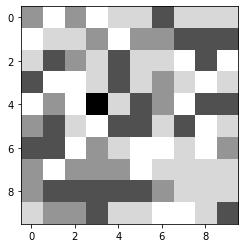

In [11]:

fig, ax = plt.subplots()
ims = []

iters=20
result = field
avalanche_size = 0

for i in range(iters):
    # draw_imshow(result)

    if is_avalanche(result):
        result = avalanche(result)
    else:
        row = np.random.randint(low=0, high=edge_size)
        col = np.random.randint(low=0, high=edge_size)
        print("Adding grain:", row, col)
        add_grain(result, X=row, Y=col)
    im = ax.imshow(result, cmap="Greys")
    if i==0:
        ax.imshow(result,cmap="Greys")
    ims.append([im])
    
    # draw_imshow(result)


ani = animation.ArtistAnimation(fig, ims, interval=1000, blit=True, repeat_delay=1000)

plt.show() #--> Instead:

#video = ani.to_html5_video()
#html = display.HTML(video)
#display.display(html)
#plt.close()                   # avoid plotting a spare static plot

